In [1]:
################


In [2]:
# Libs
from time import gmtime, strftime
import xarray as xr
import numpy as np
import geopandas as gpd

# Locals
from oggm import utils, workflow, tasks, DEFAULT_BASE_URL
import oggm.cfg as cfg
from oggm.shop import gcm_climate

In [4]:
# Initialize OGGM and set up the default run parameters
cfg.initialize(logging_level='WARNING')

# change border around the individual glaciers
cfg.PARAMS['border'] = 80

# Use Multiprocessing
cfg.PARAMS['use_multiprocessing'] = True

# For hydro output
cfg.PARAMS['store_model_geometry'] = True

# Local working directory (where OGGM will write its output)
cfg.PATHS['working_dir'] = utils.gettempdir('OGGM_merge_gcm_runs_v3', reset=True)

# RGI glaciers: Ngojumba and Khumbu
# rgi_ids = utils.get_rgi_glacier_entities(['RGI60-15.03473', 'RGI60-15.03733'])


utils.get_rgi_dir(version='62')  # path to the data after download
fr = utils.get_rgi_region_file(13, version='62')  # Central Europe
gdf = gpd.read_file(fr) 
gdf_sel = gdf.loc[gdf.O2Region == '7'] # Central Europe subregion
rgi_ids = gdf_sel


# utils.get_rgi_dir(version='62')  # path to the data after download
# fr = utils.get_rgi_region_file(11, version='62')  # Central Europe
# gdf = gpd.read_file(fr) 
# gdf_sel = gdf.loc[gdf.O2Region == '2'] # Central Europe subregion
# rgi_ids = gdf_sel

# Go - get the pre-processed glacier directories
# in OGGM v1.6 you have to explicitly indicate the url from where you want to start from
# we will use here the elevation band flowlines which are much simpler than the centerlines
gdirs = workflow.init_glacier_directories(rgi_ids, from_prepro_level=5, prepro_base_url=DEFAULT_BASE_URL)

2024-08-16 10:12:21: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2024-08-16 10:12:21: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2024-08-16 10:12:21: oggm.cfg: Multiprocessing: using all available processors (N=22)
2024-08-16 10:12:21: oggm.cfg: Multiprocessing switched ON after user settings.
2024-08-16 10:12:21: oggm.cfg: PARAMS['store_model_geometry'] changed from `False` to `True`.
2024-08-16 10:12:23: oggm.workflow: init_glacier_directories from prepro level 5 on 2730 glaciers.
2024-08-16 10:12:23: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 2730 glaciers


In [6]:
rgi_ids.head()

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,check_geom,geometry
23959,RGI60-13.23962,G098880E38243N,20070813,-9999999,98.880,38.243,13,7,1.463,4506,...,1962,0,0,0,0,9,9,CN5J425E0002,None,"POLYGON ((98.87623 38.25175, 98.87626 38.2514,..."
23960,RGI60-13.23963,G098880E38253N,20070813,-9999999,98.880,38.253,13,7,0.353,4543,...,780,0,0,0,0,9,9,CN5J425E0003,None,"POLYGON ((98.87558 38.25377, 98.87564 38.25379..."
23961,RGI60-13.23964,G099008E38129N,20070813,-9999999,99.008,38.129,13,7,0.091,4579,...,351,0,0,0,0,9,9,CN5J425E0001,None,"POLYGON ((99.00608 38.12766, 99.0059 38.12782,..."
23962,RGI60-13.23965,G099480E38238N,20070813,-9999999,99.480,38.238,13,7,0.210,4569,...,793,0,0,0,0,9,9,CN5J425I0001,None,"POLYGON ((99.4761 38.23747, 99.47618 38.23762,..."
23963,RGI60-13.23966,G101438E37739N,20090617,-9999999,101.438,37.739,13,7,0.038,4418,...,202,0,0,0,0,9,9,None,None,"POLYGON ((101.43793 37.7378, 101.43775 37.7377..."


In [7]:
all_GCM = [ 'ipsl-cm6a-lr_r1i1p1f1',
           'mpi-esm1-2-hr_r1i1p1f1',
           'mri-esm2-0_r1i1p1f1', 'ukesm1-0-ll_r1i1p1f2']

# define the SSP scenarios
all_scenario = ['ssp126', 'ssp370', 'ssp585']

for GCM in all_GCM:
    for ssp in all_scenario:
        # we will pretend that 'mpi-esm1-2-hr_r1i1p1f1' is missing for `ssp370`
        # to later show how to deal with missing values, 
        # if you want to use this
        # code you can of course remove the "if" and just download all GCMs and SSPS 

        # Download and process them:
        workflow.execute_entity_task(gcm_climate.process_monthly_isimip_data, gdirs, 
                                        ssp = ssp,
                                        # gcm ensemble -> you can choose another one
                                        member=GCM,
                                        # recognize the climate file for later
                                        output_filesuffix=f'_{GCM}_{ssp}'
                                        );
            
# you could create a similar workflow with CMIP5 or CMIP6 

2024-08-16 10:13:02: oggm.workflow: Execute entity tasks [process_monthly_isimip_data] on 2730 glaciers
2024-08-16 10:16:40: oggm.workflow: Execute entity tasks [process_monthly_isimip_data] on 2730 glaciers
2024-08-16 10:20:13: oggm.workflow: Execute entity tasks [process_monthly_isimip_data] on 2730 glaciers
2024-08-16 10:23:27: oggm.workflow: Execute entity tasks [process_monthly_isimip_data] on 2730 glaciers
2024-08-16 10:27:13: oggm.workflow: Execute entity tasks [process_monthly_isimip_data] on 2730 glaciers
2024-08-16 10:30:17: oggm.workflow: Execute entity tasks [process_monthly_isimip_data] on 2730 glaciers
2024-08-16 10:33:27: oggm.workflow: Execute entity tasks [process_monthly_isimip_data] on 2730 glaciers
2024-08-16 10:36:25: oggm.workflow: Execute entity tasks [process_monthly_isimip_data] on 2730 glaciers
2024-08-16 10:39:18: oggm.workflow: Execute entity tasks [process_monthly_isimip_data] on 2730 glaciers
2024-08-16 10:42:12: oggm.workflow: Execute entity tasks [proces

In [ ]:
# all_GCM = ['gfdl-esm4_r1i1p1f1', 'ipsl-cm6a-lr_r1i1p1f1',
#            'mpi-esm1-2-hr_r1i1p1f1',
#            'mri-esm2-0_r1i1p1f1', 'ukesm1-0-ll_r1i1p1f2']

# # define the SSP scenarios
# all_scenario = ['ssp126', 'ssp370', 'ssp585']

# for GCM in all_GCM:
#     for ssp in all_scenario:
#         # we will pretend that 'mpi-esm1-2-hr_r1i1p1f1' is missing for `ssp370`
#         # to later show how to deal with missing values, 
#         # if you want to use this
#         # code you can of course remove the "if" and just download all GCMs and SSPS 
#         if (ssp == 'ssp370') & (GCM=='mpi-esm1-2-hr_r1i1p1f1'):
#             pass
#         else:
#             # Download and process them:
#             workflow.execute_entity_task(gcm_climate.process_monthly_isimip_data, gdirs, 
#                                          ssp = ssp,
#                                          # gcm ensemble -> you can choose another one
#                                          member=GCM,
#                                          # recognize the climate file for later
#                                          output_filesuffix=f'_{GCM}_{ssp}'
#                                          );
            
# # you could create a similar workflow with CMIP5 or CMIP6 

In [ ]:
#########在这一步失败了

In [8]:
for GCM in all_GCM:
    for scen in all_scenario:
        rid = '_{}_{}'.format(GCM, scen)
        try:  # check if (GCM, scen) combination exists
            workflow.execute_entity_task(tasks.run_with_hydro, gdirs,
                                         run_task=tasks.run_from_climate_data,
                                         ys=2020,  # star year of our projection runs
                                         climate_filename='gcm_data',  # use gcm_data, not climate_historical
                                         climate_input_filesuffix=rid,  # use the chosen GCM and scenario
                                         init_model_filesuffix='_spinup_historical',  # this is important! Start from 2020 glacier
                                         output_filesuffix=rid,  # the filesuffix of the resulting file, so we can find it later
                                         store_monthly_hydro=True
                                        );

        except FileNotFoundError:
            # if a certain scenario is not available for a GCM we land here
            # and we inidcate this by printing a message so the user knows
            # this scenario is missing
            # (in this case of course, the file actually is available, but we just pretend that it is not...)
            print('No ' + GCM +' run with scenario ' + scen + ' available!')

2024-08-16 10:51:22: oggm.workflow: Execute entity tasks [run_with_hydro] on 2730 glaciers


2024-08-16 10:51:31: oggm.core.flowline: FileNotFoundError occurred during task run_from_climate_data_ipsl-cm6a-lr_r1i1p1f1_ssp126 on RGI60-13.31528: [Errno 2] No such file or directory: '/tmp/OGGM/OGGM_merge_gcm_runs_v3/per_glacier/RGI60-13/RGI60-13.31/RGI60-13.31528/model_geometry_spinup_historical.nc'
2024-08-16 10:51:31: oggm.core.flowline: FileNotFoundError occurred during task run_with_hydro_ipsl-cm6a-lr_r1i1p1f1_ssp126 on RGI60-13.31528: [Errno 2] No such file or directory: '/tmp/OGGM/OGGM_merge_gcm_runs_v3/per_glacier/RGI60-13/RGI60-13.31/RGI60-13.31528/model_geometry_spinup_historical.nc'
2024-08-16 10:51:40: oggm.core.flowline: FileNotFoundError occurred during task run_from_climate_data_ipsl-cm6a-lr_r1i1p1f1_ssp126 on RGI60-13.31835: [Errno 2] No such file or directory: '/tmp/OGGM/OGGM_merge_gcm_runs_v3/per_glacier/RGI60-13/RGI60-13.31/RGI60-13.31835/model_geometry_spinup_historical.nc'
2024-08-16 10:51:40: oggm.core.flowline: FileNotFoundError occurred during task run_with_

2024-08-16 10:52:49: oggm.workflow: Execute entity tasks [run_with_hydro] on 2730 glaciers


No ipsl-cm6a-lr_r1i1p1f1 run with scenario ssp126 available!


2024-08-16 10:54:40: oggm.workflow: Execute entity tasks [run_with_hydro] on 2730 glaciers


No ipsl-cm6a-lr_r1i1p1f1 run with scenario ssp370 available!


2024-08-16 10:56:38: oggm.workflow: Execute entity tasks [run_with_hydro] on 2730 glaciers


No ipsl-cm6a-lr_r1i1p1f1 run with scenario ssp585 available!


2024-08-16 10:58:41: oggm.workflow: Execute entity tasks [run_with_hydro] on 2730 glaciers


No mpi-esm1-2-hr_r1i1p1f1 run with scenario ssp126 available!


2024-08-16 11:00:47: oggm.workflow: Execute entity tasks [run_with_hydro] on 2730 glaciers


No mpi-esm1-2-hr_r1i1p1f1 run with scenario ssp370 available!


2024-08-16 11:02:35: oggm.workflow: Execute entity tasks [run_with_hydro] on 2730 glaciers


No mpi-esm1-2-hr_r1i1p1f1 run with scenario ssp585 available!


2024-08-16 11:04:41: oggm.workflow: Execute entity tasks [run_with_hydro] on 2730 glaciers


No mri-esm2-0_r1i1p1f1 run with scenario ssp126 available!


2024-08-16 11:06:37: oggm.workflow: Execute entity tasks [run_with_hydro] on 2730 glaciers


No mri-esm2-0_r1i1p1f1 run with scenario ssp370 available!


2024-08-16 11:08:39: oggm.workflow: Execute entity tasks [run_with_hydro] on 2730 glaciers


No mri-esm2-0_r1i1p1f1 run with scenario ssp585 available!


2024-08-16 11:10:44: oggm.workflow: Execute entity tasks [run_with_hydro] on 2730 glaciers


No ukesm1-0-ll_r1i1p1f2 run with scenario ssp126 available!


2024-08-16 11:12:45: oggm.workflow: Execute entity tasks [run_with_hydro] on 2730 glaciers


No ukesm1-0-ll_r1i1p1f2 run with scenario ssp370 available!
No ukesm1-0-ll_r1i1p1f2 run with scenario ssp585 available!


In [13]:
utils.compile_glacier_statistics(gdirs);  # saved as glacier_statistics.csv in the WORKING_DIR folder

2024-08-16 11:22:32: oggm.utils: Applying global task compile_glacier_statistics on 2730 glaciers
2024-08-16 11:22:32: oggm.workflow: Execute entity tasks [glacier_statistics] on 2730 glaciers


In [40]:
ds = utils.compile_run_output(gdirs);  # saved as run_output.nc in the WORKING_DIR folder

2024-08-16 14:10:01: oggm.utils: Applying global task compile_run_output on 2730 glaciers
2024-08-16 14:10:01: oggm.utils: Applying compile_run_output on 2730 gdirs.


RuntimeError: Found no valid glaciers!

In [17]:
import pandas as pd
df_stats = pd.read_csv(os.path.join("/tmp/OGGM/OGGM_merge_gcm_runs_v3", 'glacier_statistics.csv'), index_col=0)

In [51]:
print("run_output"+file_id+'.nc')

run_output_mri-esm2-0_r1i1p1f1_ssp126.nc


In [ ]:
"\\wsl.localhost\Ubuntu-22.04\tmp\OGGM\OGGM_merge_gcm_runs_v3\run_output_ipsl-cm6a-lr_r1i1p1f1_ssp126.nc"

In [50]:
ds = xr.open_dataset("run_output"+file_id+'.nc')

FileNotFoundError: [Errno 2] No such file or directory: '/home/dcl/run_output_mri-esm2-0_r1i1p1f1_ssp126.nc'

In [41]:
file_id  = '_{}_{}'.format(all_GCM[2], all_scenario[0])   ##为什么可以compile_run_output一个nc，而不能整体compile_run_output
utils.compile_run_output(gdirs, input_filesuffix=file_id)
ds = xr.Dataset(file_id)

2024-08-16 14:15:14: oggm.utils: Applying global task compile_run_output on 2730 glaciers
2024-08-16 14:15:14: oggm.utils: Applying compile_run_output on 2730 gdirs.


PermissionError: [Errno 13] Permission denied: '/tmp/OGGM/OGGM_merge_gcm_runs_v3/run_output_mri-esm2-0_r1i1p1f1_ssp126.nc'

In [32]:
ds

In [26]:
ds_all = []  # in this array all datasets going to be stored with additional coordinates GCM and SCENARIO
creation_date = strftime("%Y-%m-%d %H:%M:%S", gmtime())  # here add the current time for info
for GCM in all_GCM:  # loop through all GCMs
    for scen in all_scenario:  # loop through all SSPs
        try:  # check if GCM, SCENARIO combination exists
            rid = '_{}_{}'.format(GCM, scen)  # put together the same filesuffix which was used during the projection runs

            ds_tmp = utils.compile_run_output(gdirs, input_filesuffix=rid)  # open one model run

            ds_tmp.coords['GCM'] = GCM  # add GCM as a coordinate
            ds_tmp.coords['GCM'].attrs['description'] = 'used Global circulation Model'  # add a description for GCM
            ds_tmp = ds_tmp.expand_dims("GCM")  # add GCM as a dimension to all Data variables

            ds_tmp.coords['SCENARIO'] = scen  # add scenario (here ssp) as a coordinate
            ds_tmp.coords['SCENARIO'].attrs['description'] = 'used scenario (here SSPs)'
            ds_tmp = ds_tmp.expand_dims("SCENARIO")  # add SSO as a dimension to all Data variables

            ds_tmp.attrs['creation_date'] = creation_date  # also add todays date for info
            ds_all.append(ds_tmp)  # add the dataset with extra coordinates to our final ds_all array

        except RuntimeError as err:  # here we land if an error occured
            if str(err) == 'Found no valid glaciers!':  # This is the error message if the GCM, SCENARIO (here ssp) combination does not exist
                print(f'No data for GCM {GCM} with SCENARIO {scen} found!')  # print a descriptive message
            else:
                raise RuntimeError(err)  # if an other error occured we just raise it

2024-08-16 11:37:24: oggm.utils: Applying global task compile_run_output on 2730 glaciers
2024-08-16 11:37:24: oggm.utils: Applying compile_run_output on 2730 gdirs.


AttributeError: 'NoneType' object has no attribute 'coords'

In [27]:
ds_tmp

In [ ]:
ds_merged = xr.combine_by_coords(ds_all, fill_value=np.nan)  # define how the missing GCM, SCENARIO combinations should be filled

In [ ]:
ds_merged.to_netcdf('merged_GCM_projections_v3.nc')

In [ ]:
with xr.open_dataset('merged_GCM_projections_v3.nc') as ds:
    ds_merged = ds

In [ ]:
# # the missing values were filled with np.NaN values for all time points and glaciers 
# assert np.all(np.isnan(ds_merged['volume'].sel(SCENARIO='ssp370').sel(GCM='mpi-esm1-2-hr_r1i1p1f1')))

AssertionError: 

In [ ]:
ds_total_volume = ds_merged['volume'].sum(dim='rgi_id',  # over which dimension the sum should be taken, here we want to sum up over all glacier ids
                                          skipna=True,  # ignore nan values
                                          # important, we need values for every glacier (here 2) to do the sum
                                          # if some have NaN, the sum should also be NaN (if you don't set min_count, the sum will be 0, which is bad)
                                          min_count=len(ds_merged.rgi_id), 
                                          keep_attrs=True)  # keep the variable descriptions   
# perfect, now, the `NaN` is preserved!
# assert np.all(np.isnan(ds_total_volume.sel(SCENARIO='ssp370').sel(GCM='mpi-esm1-2-hr_r1i1p1f1')))

In [ ]:
ds_total_volume_median = ds_total_volume.median(dim='GCM',  # over which dimension the median should be calculated
                                            skipna=True,  # ignore nan values
                                            keep_attrs=True)  # keep all variable descriptions
ds_total_volume_median

<xarray.DataArray 'volume' (SCENARIO: 3, time: 82)> Size: 2kB
array([[3.67150684e+07, 3.39417471e+07, 3.09982292e+07, 2.60087420e+07,
        2.12759293e+07, 1.84947318e+07, 1.58837629e+07, 1.28201852e+07,
        1.11710450e+07, 1.03196338e+07, 8.03303952e+06, 7.08245139e+06,
        7.15820502e+06, 6.54842144e+06, 6.46748961e+06, 5.94709313e+06,
        5.46297510e+06, 4.90393326e+06, 4.70386694e+06, 4.24443349e+06,
        3.99629884e+06, 3.85073824e+06, 3.71932417e+06, 3.52263255e+06,
        3.27338942e+06, 3.10835321e+06, 3.15694929e+06, 2.98597507e+06,
        2.91822331e+06, 2.64269814e+06, 2.54400380e+06, 2.40222278e+06,
        2.29149986e+06, 2.17857706e+06, 1.99346334e+06, 1.80983169e+06,
        1.58844741e+06, 1.49804997e+06, 1.29848267e+06, 1.09716233e+06,
        1.13412147e+06, 8.52695840e+05, 7.80833304e+05, 7.44283885e+05,
        7.03132431e+05, 7.04626815e+05, 6.35214755e+05, 5.24811037e+05,
        4.80863970e+05, 4.26400679e+05, 4.60983897e+05, 3.90701604e+05,
        4.04253067e+05, 5.09064257e+05, 4.17704891e+05, 4.56576617e+05,
        3.91701384e+05, 3.61264384e+05, 3.19001931e+05, 2.43512268e+05,
        2.20872612e+05, 2.58644882e+05, 2.43563827e+05, 2.11059957e+05,
        1.90879181e+05, 1.62490927e+05, 1.35204169e+05, 1.36822044e+05,
        1.50555730e+05, 1.84556578e+05, 1.59025690e+05, 1.52064408e+05,
        1.44006494e+05, 1.53703645e+05, 1.86296611e+05, 2.13802359e+05,
        1.98899024e+05, 2.17680368e+05, 2.02735953e+05, 1.89120594e+05,
...
        2.39520319e+07, 2.16544165e+07, 1.95974954e+07, 1.75997305e+07,
        1.46677538e+07, 1.29100301e+07, 1.12516691e+07, 9.31181181e+06,
        8.48943960e+06, 6.85209729e+06, 6.05031031e+06, 5.67236526e+06,
        5.08277049e+06, 4.67965226e+06, 4.28911500e+06, 3.98968886e+06,
        3.76772593e+06, 3.62724266e+06, 3.36087434e+06, 3.14990255e+06,
        3.06225582e+06, 2.77164106e+06, 2.50806606e+06, 2.33205546e+06,
        2.16947395e+06, 1.94690009e+06, 1.76448053e+06, 1.60582907e+06,
        1.44199320e+06, 1.27070885e+06, 1.08781794e+06, 8.31803458e+05,
        6.86098404e+05, 5.02287932e+05, 3.94172173e+05, 2.83010214e+05,
        2.25789901e+05, 1.65504484e+05, 1.21500563e+05, 7.29416172e+04,
        4.69146091e+04, 3.25802627e+04, 1.26111683e+04, 4.82165460e+02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.10165634e+01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]])
Coordinates:
  * time            (time) float64 656B 2.02e+03 2.021e+03 ... 2.1e+03 2.101e+03
    hydro_year      (time) int64 656B ...
    hydro_month     (time) int64 656B ...
    calendar_year   (time) int64 656B ...
    calendar_month  (time) int64 656B ...
  * SCENARIO        (SCENARIO) <U6 72B 'ssp126' 'ssp370' 'ssp585'
Attributes:
    description:  Total glacier volume
    unit:         m 3

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# estimate the minimum volume for each time step and scenario over the GCMs
ds_total_volume_min = ds_total_volume.min(dim='GCM', keep_attrs=True,skipna=True)
# estimate the 25th percentile volume for each time step and scenario over the GCMs
ds_total_volume_p25 = ds_total_volume.quantile(0.25, dim='GCM', keep_attrs=True,skipna=True)
# estimate the 50th percentile volume for each time step and scenario over the GCMs
ds_total_volume_p50 = ds_total_volume.quantile(0.5, dim='GCM', keep_attrs=True,skipna=True)
# this is the same as the median -> Let's check
np.testing.assert_allclose(ds_total_volume_median,ds_total_volume_p50)
# estimate the 75th percentile volume for each time step and scenario over the GCMs
ds_total_volume_p75 = ds_total_volume.quantile(0.75, dim='GCM', keep_attrs=True,skipna=True)
# estimate the maximum volume for each time step and scenario over the GCMs
ds_total_volume_max = ds_total_volume.max(dim='GCM', keep_attrs=True,skipna=True)

# Think twice if it is appropriate to compute a mean/std over your GCM sample, is it Gaussian distributed?
# Otherwise use instead median and percentiles or total range
ds_total_volume_mean = ds_total_volume.mean(dim='GCM', keep_attrs=True,
                                            skipna=True)
ds_total_volume_std = ds_total_volume.std(dim='GCM', keep_attrs=True,
                                            skipna=True)

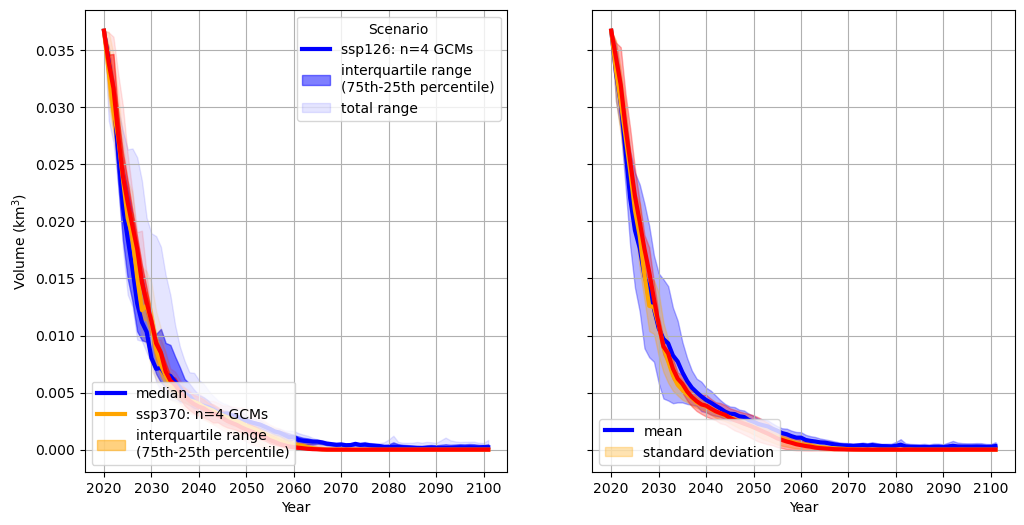

In [ ]:
color_dict={'ssp126':'blue', 'ssp370':'orange', 'ssp585':'red'}


fig, axs = plt.subplots(1,2, figsize=(12,6), 
                        sharey=True # we want to share the y axis betweeen the subplots
                       )
for scenario in color_dict.keys():
    # get amount of GCMs per Scenario to add it to the legend:
    n = len(ds_total_volume.sel(SCENARIO=scenario).dropna(dim='GCM').GCM)
    axs[0].plot(ds_total_volume_median.time,
                ds_total_volume_median.sel(SCENARIO=scenario)/1e9,  # m3 -> km3
                label=f'{scenario}: n={n} GCMs',
                color=color_dict[scenario],lw=3)
    axs[0].fill_between(ds_total_volume_median.time,
                        ds_total_volume_p25.sel(SCENARIO=scenario)/1e9,
                        ds_total_volume_p75.sel(SCENARIO=scenario)/1e9,
                        color=color_dict[scenario],
                        alpha=0.5,
                        label='interquartile range\n(75th-25th percentile)')
    axs[0].fill_between(ds_total_volume_median.time,
                        ds_total_volume_min.sel(SCENARIO=scenario)/1e9,
                        ds_total_volume_max.sel(SCENARIO=scenario)/1e9,
                        color=color_dict[scenario],
                        alpha=0.1,
                        label='total range')


for scenario in color_dict.keys():
    axs[1].plot(ds_total_volume_mean.time,
                 ds_total_volume_mean.sel(SCENARIO=scenario)/1e9,  # m3 -> km3
                 color=color_dict[scenario],
                 label='mean',lw=3)
    axs[1].fill_between(ds_total_volume_mean.time,
                        ds_total_volume_mean.sel(SCENARIO=scenario)/1e9 - ds_total_volume_std.sel(SCENARIO=scenario)/1e9,
                        ds_total_volume_mean.sel(SCENARIO=scenario)/1e9 + ds_total_volume_std.sel(SCENARIO=scenario)/1e9,
                        alpha=0.3,
                        color=color_dict[scenario],
                       label='standard deviation')
    
for ax in axs:
    # get all handles and labels and then create two different legends
    handles, labels = ax.get_legend_handles_labels()
    if ax == axs[0]:
        # we want to have two legends, let's save the first one
        # which just shows the colors and the different SSPs here 
        leg1 = ax.legend(handles[:3], labels[:3], title='Scenario') 
        ax.set_ylabel(r'Volume (km$^3$)')
        # create the second one, that shows the different statistical estimates
        ax.legend([handles[0],handles[3],handles[4]],
                  ['median',labels[3],labels[4]], loc='lower left')
        # we need to allow for two legend, this is done like that
        ax.add_artist(leg1)
    else:
        # for the second plot, we only want to have the legend for mean and std
        ax.legend(handles[::3], labels[::3], loc='lower left') 
    ax.set_xlabel('Year');
    ax.grid()